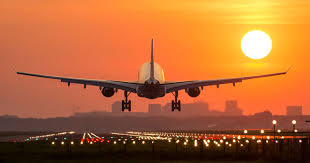

# Flight Price Exploratory Data Analysis

## 1. Introduction
In this project, we perform an exploratory data analysis (EDA) on a dataset of domestic flight prices in India. The goal is to uncover the key factors that influence airfare, detect patterns and anomalies, and derive insights that could guide a predictive model for flight price forecasting.

## 2. Dataset Overview
- **Source file:** `flight_price.xlsx`
- **Total records:** 10,683  
- **Time period covered:** March 1, 2019 – June 27, 2019  
- **Features (11):**
  - `Airline` – Name of the airline (12 unique carriers)
  - `Date_of_Journey` – Date of travel (dd/mm/yyyy)
  - `Source` – Departure city (5 unique)
  - `Destination` – Arrival city (6 unique)
  - `Route` – Sequence of stops (128 unique combinations)
  - `Dep_Time` – Departure time (HH:MM)
  - `Arrival_Time` – Arrival time (HH:MM, sometimes with a different date)
  - `Duration` – Total travel duration (e.g. “2h 50m”)
  - `Total_Stops` – Number of stops (non-stop, 1, 2, 3, 4 stops; some missing)
  - `Additional_Info` – Miscellaneous notes (e.g., “In-flight meal not included”, “1 Short layover”)
  - `Price` – Ticket price in Indian Rupees (target variable)

## 3. Objectives
1. **Understand data quality**  
   - Identify and handle missing or inconsistent values  
   - Parse dates and times into machine-readable formats  
2. **Feature engineering**  
   - Extract day, month, weekday from `Date_of_Journey`  
   - Convert `Duration` into total minutes  
   - Break down `Dep_Time` and `Arrival_Time` into hour and minute components  
   - Encode `Total_Stops` as numeric  
3. **Univariate and bivariate analysis**  
   - Distribution of ticket prices  
   - Price variation by Airline, Source, Destination, Stops  
   - Seasonal trends (monthly/weekday patterns)  
4. **Multivariate exploration**  
   - Correlation matrix and heatmap to spot inter-feature relationships  
   - Interaction of multiple factors (e.g., Airline vs. Stops vs. Price)  
5. **Key findings & insights**  
   - Summarize which factors drive higher or lower fares  
   - Highlight any surprising patterns or outliers  
6. **Next steps**  
   - Prepare cleaned & feature-rich data for modeling  
   - Prototype a regression model for price prediction

## 4. Data Cleaning & Preprocessing
- **Missing values:**  
  - Some `Total_Stops` and `Additional_Info` entries are null or inconsistent (e.g., “No info” vs “No Info”)
- **Date parsing:**  
  - Convert `Date_of_Journey` to `datetime`
- **Time parsing:**  
  - Split `Dep_Time`/`Arrival_Time` into hour/minute; handle cases where arrival date differs
- **Duration normalization:**  
  - Extract hours and minutes; compute total duration in minutes
- **Categorical encoding:**  
  - Map `Total_Stops` to integer (non-stop→0, 1 stop→1, …)
  - One-hot encode or label-encode other nominal features

## 5. Preliminary Insights (to be filled in after analysis)
- **Price distribution:** e.g., skewness, outliers  
- **Top 3 most expensive routes**  
- **Airlines with consistently lower fares**  
- **Impact of number of stops on price**  
- **Seasonal effects:** cheapest/most expensive months and weekdays  

---

*This EDA will lay the foundation for building a robust flight price prediction model by revealing the underlying structure and key drivers in the data.*  


In [ ]:
import pandas as pd

# 1) Overall Analysis

#### 1.1) Loading the dataset

In [ ]:
df = pd.read_excel('/content/flight_price.xlsx')

In [ ]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [ ]:
'''
KPI's

1) Average Ticket Price by Airline
2) Average Ticket Price by Route (Source → Destination)
3) Average Price by Number of Stops
4) Flight Volume by Airline
5) Flight Volume by Source Airport
6) Monthly Price Trend
7) Average Departure Hour by Airline
'''

#### 1.2) basic data exploration

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


#### 1.3) Checking Null Values

In [ ]:
df.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0


#### 1.4) Removing Null Values

In [ ]:
df.dropna(subset = ['Route','Total_Stops'],inplace=True)

In [ ]:
df.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,0
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,0
Additional_Info,0


In [ ]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


# 2) Column Wise Cleaning

#### 2.1) Airlines

In [ ]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [ ]:
df['Airline'].value_counts()

,count
Airline,
Jet Airways,3849
IndiGo,2053
Air India,1751
Multiple carriers,1196
SpiceJet,818
Vistara,479
Air Asia,319
GoAir,194
Multiple carriers Premium economy,13


#### 2.2) Date Of Journey

In [ ]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [ ]:
df['Date_of_Journey'].value_counts()

,count
Date_of_Journey,
18/05/2019,504
6/06/2019,503
21/05/2019,497
9/06/2019,495
12/06/2019,493
9/05/2019,484
21/03/2019,423
15/05/2019,405
27/05/2019,382


In [ ]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [ ]:
df['DATE'] = df['Date_of_Journey'].str.strip().str.split('/').str[0]

In [ ]:
df['MONTH'] = df['Date_of_Journey'].str.strip().str.split('/').str[1]
df['YEAR'] = df['Date_of_Journey'].str.strip().str.split('/').str[2]

In [ ]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,DATE,MONTH,YEAR
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019


In [ ]:
df['DATE'] = df['DATE'].astype(int)
df['MONTH'] = df['MONTH'].astype(int)
df['YEAR'] = df['YEAR'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
 11  DATE             10682 non-null  int64 
 12  MONTH            10682 non-null  int64 
 13  YEAR             10682 non-null  int64 
dtypes: int64(4), object(10)
memory usage: 1.5+ MB


In [ ]:
date = []
for i in df['Date_of_Journey']:
  date.append(i.split('/')[0])

df['DATE'] = date

24
1
9
12
01
24
12
01
12
27
1
18
24
9
24
3
15
12
12
27
6
21
3
1
6
9
1
15
18
15
18
1
6
15
18
27
21
18
06
3
21
15
18
6
21
24
27
3
15
27
9
1
24
18
3
24
01
6
6
6
6
3
3
15
24
24
24
6
21
12
1
09
24
24
21
09
3
3
15
21
9
24
6
27
18
06
24
6
1
24
27
6
12
6
21
21
15
3
18
12
15
9
24
12
1
18
27
27
9
24
18
12
12
6
27
18
6
3
12
9
9
3
6
1
12
21
12
6
24
3
21
15
12
15
21
18
6
27
24
3
9
6
15
9
21
21
3
3
24
9
3
21
27
12
24
9
27
03
12
6
1
24
9
9
12
27
3
21
27
27
3
18
9
27
6
12
3
21
6
21
1
27
15
6
12
24
27
6
3
12
03
27
24
27
12
27
12
24
18
27
24
3
24
18
3
18
27
27
21
18
12
6
6
3
1
24
9
1
12
9
12
12
18
9
9
6
3
27
21
27
24
12
18
9
1
1
6
18
15
24
18
6
9
12
18
24
9
15
27
6
3
1
24
27
21
21
9
21
6
3
3
03
18
9
21
21
24
12
1
06
1
12
1
6
9
15
27
12
9
24
12
3
24
6
6
27
12
24
27
12
3
21
6
6
18
6
21
18
6
9
3
27
12
6
9
27
15
6
6
24
21
3
12
3
6
6
21
27
1
15
27
9
15
12
1
27
27
6
24
24
9
21
9
12
24
6
9
3
18
27
15
27
9
24
9
6
27
12
9
24
27
15
15
01
27
1
18
21
21
24
9
24
27
06
24
15
12
3
9
09
15
24
9
3
3
9
27
12
24
18
6
9
9


In [ ]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,DATE,MONTH,YEAR
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019


In [ ]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [ ]:
del df['Route']

In [ ]:
df

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,DATE,MONTH,YEAR
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,2019
10679,Air India,27/04/2019,Kolkata,Banglore,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,2019
10680,Jet Airways,27/04/2019,Banglore,Delhi,08:20,11:20,3h,non-stop,No info,7229,27,4,2019
10681,Vistara,01/03/2019,Banglore,New Delhi,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,2019


In [ ]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,DATE,MONTH,YEAR
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019


In [ ]:
df['Dep_HRS'] = df['Dep_Time'].str.split(':').str[0]
df['Dep_MIN'] = df['Dep_Time'].str.split(':').str[1]

In [ ]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,DATE,MONTH,YEAR,Dep_HRS,Dep_MIN
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,05,50


In [ ]:
del df['Dep_Time']
del df['Date_of_Journey']

In [ ]:
df.head(2)

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,DATE,MONTH,YEAR,Dep_HRS,Dep_MIN
0,IndiGo,Banglore,New Delhi,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,13:15,7h 25m,2 stops,No info,7662,1,5,2019,05,50


In [ ]:
df['Arrival_HRS'] = df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[0]
df['Arrival_Mins'] = df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[1]

In [ ]:
df.head(2)

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,DATE,MONTH,YEAR,Dep_HRS,Dep_MIN,Arrival_HRS,Arrival_Mins
0,IndiGo,Banglore,New Delhi,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20,01,10
1,Air India,Kolkata,Banglore,13:15,7h 25m,2 stops,No info,7662,1,5,2019,05,50,13,15


In [ ]:
del df['Arrival_Time']

In [ ]:
df.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,DATE,MONTH,YEAR,Dep_HRS,Dep_MIN,Arrival_HRS,Arrival_Mins
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,24,3,2019,22,20,01,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,1,5,2019,05,50,13,15


In [ ]:
df['Duartion_hrs'] = df['Duration'].str.split(' ').str[0].replace('h','').str[0]

In [ ]:
df['Duartion_min'] = df['Duration'].str.replace('m','').str.strip(' ').str.split(' ').str[1]

In [ ]:
df.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,DATE,MONTH,YEAR,Dep_HRS,Dep_MIN,Arrival_HRS,Arrival_Mins,Duartion_hrs,Duartion_min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,24,3,2019,22,20,01,10,2,50
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,1,5,2019,05,50,13,15,7,25


In [ ]:
df['Duartion_min'].fillna(0,inplace=True)

<ipython-input-80-631b9a0ef0bc>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Duartion_min'].fillna(0,inplace=True)


In [ ]:
df['Duartion_min'].unique()

array(['50', '25', 0, '45', '30', '5', '15', '35', '10', '20', '55', '40'],
      dtype=object)

In [ ]:
df['Duration_hrs'] = df['Duartion_hrs'].astype(int)

In [ ]:
df.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,DATE,MONTH,YEAR,Dep_HRS,Dep_MIN,Arrival_HRS,Arrival_Mins,Duartion_hrs,Duartion_min,duration_hrs,Duration_hrs
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,24,3,2019,22,20,01,10,2,50,2,2
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,1,5,2019,05,50,13,15,7,25,7,7


In [ ]:
del df['duration_hrs']

In [ ]:
df.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,DATE,MONTH,YEAR,Dep_HRS,Dep_MIN,Arrival_HRS,Arrival_Mins,Duartion_hrs,Duartion_min,Duration_hrs
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,24,3,2019,22,20,01,10,2,50,2
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,1,5,2019,05,50,13,15,7,25,7


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Duration         10682 non-null  object
 4   Total_Stops      10682 non-null  object
 5   Additional_Info  10682 non-null  object
 6   Price            10682 non-null  int64 
 7   DATE             10682 non-null  int64 
 8   MONTH            10682 non-null  int64 
 9   YEAR             10682 non-null  int64 
 10  Dep_HRS          10682 non-null  object
 11  Dep_MIN          10682 non-null  object
 12  Arrival_HRS      10682 non-null  object
 13  Arrival_Mins     10682 non-null  object
 14  Duartion_hrs     10682 non-null  object
 15  Duartion_min     10682 non-null  object
 16  Duration_hrs     10682 non-null  int64 
dtypes: int64(5), object(12)
memory usage

In [ ]:
df.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,DATE,MONTH,YEAR,Dep_HRS,Dep_MIN,Arrival_HRS,Arrival_Mins,Duartion_min,Duration_hrs
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,24,3,2019,22,20,01,10,50,2
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,1,5,2019,05,50,13,15,25,7


In [ ]:
df['Duration_hrs'] = df['Duration_hrs']*60

In [ ]:
df.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,DATE,MONTH,YEAR,Dep_HRS,Dep_MIN,Arrival_HRS,Arrival_Mins,Duartion_min,Duration_hrs
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,24,3,2019,22,20,01,10,50,120
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,1,5,2019,05,50,13,15,25,420


In [ ]:
df['Duartion_min'] = df['Duartion_min'].astype(int)

In [ ]:
df['Total_Duration'] = df['Duration_hrs'] + df['Duartion_min']

In [ ]:
df.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,DATE,MONTH,YEAR,Dep_HRS,Dep_MIN,Arrival_HRS,Arrival_Mins,Duartion_min,Duration_hrs,Total_Duration
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,24,3,2019,22,20,01,10,50,120,170
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,1,5,2019,05,50,13,15,25,420,445


In [ ]:
df.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,DATE,MONTH,YEAR,Dep_HRS,Dep_MIN,Arrival_HRS,Arrival_Mins,Duartion_min,Duration_hrs,Total_Duration
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,2019,22,20,01,10,50,120,170
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,2019,05,50,13,15,25,420,445


In [ ]:
del df['Duartion_min']
del df['Duration_hrs']

In [ ]:
df.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,DATE,MONTH,YEAR,Dep_HRS,Dep_MIN,Arrival_HRS,Arrival_Mins,Total_Duration
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,2019,22,20,01,10,170
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,2019,05,50,13,15,445


In [ ]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [ ]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [ ]:
del df['Additional_Info']

In [ ]:
df.head(2)

,Airline,Source,Destination,Total_Stops,Price,DATE,MONTH,YEAR,Dep_HRS,Dep_MIN,Arrival_HRS,Arrival_Mins,Total_Duration
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,2019,22,20,01,10,170
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,2019,05,50,13,15,445


In [ ]:
df.to_csv('Cleaned_Data.csv')

In [ ]:
'''
KPI's

1) Average Ticket Price by Airline
2) Average Ticket Price by Route (Source → Destination)
3) Average Price by Number of Stops
4) Flight Volume by Airline
5) Flight Volume by Source Airport
6) Monthly Price Trend
7) Average Departure Hour by Airline

'''

In [ ]:
df.head(2)

,Airline,Source,Destination,Total_Stops,Price,DATE,MONTH,YEAR,Dep_HRS,Dep_MIN,Arrival_HRS,Arrival_Mins,Total_Duration
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,2019,22,20,01,10,170
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,2019,05,50,13,15,445


In [ ]:
df.groupby('Airline')['Price'].mean().sort_values(ascending=False)

,Price
Airline,
Jet Airways Business,58358.666667
Jet Airways,11643.923357
Multiple carriers Premium economy,11418.846154
Multiple carriers,10902.678094
Air India,9612.427756
Vistara Premium economy,8962.333333
Vistara,7796.348643
GoAir,5861.056701
IndiGo,5673.682903


In [ ]:
# 2) Average Ticket Price by Route (Source → Destination)

df.groupby(['Source','Destination'])['Price'].mean().sort_values(ascending=False)

,,Price
Source,Destination,
Banglore,New Delhi,11917.716738
Delhi,Cochin,10540.113536
Kolkata,Banglore,9158.389411
Banglore,Delhi,5143.918577
Mumbai,Hyderabad,5059.708752
Chennai,Kolkata,4789.892388
